In [26]:
# !!! The rewrite from angle to energy for 25kV fails, due to a too big correction of angle, giving negative values

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [28]:
# Equations:
h_p = 4.136*10**(-15) #in eV*s
c_light = 2.9979*10**8 # in m/s
d_LiF = 2.014*10**(-10) # in m

def energy(x): #comes out in eV
    E = (h_p*c_light)/(2*d_LiF*math.sin(x*math.pi/180))
    return E

In [29]:
# The 35kV anode characterization data

In [30]:
#data_LiF_35kV = open('/Users/QDevMaster12/Dropbox/LiF/anode_characterization_35kV_001-kopi', 'r')
data_LiF_35kV = open('C:/Users/kylli/Dropbox/LiF/anode_characterization_35kV_001-kopi', 'r')

rows = []
rows2= []
for line in data_LiF_35kV:
    # Split on any whitespace (including tab characters)
    row = line.split()
    # Convert strings to numeric values:
    row[0] = float(row[0])
    row[1] = int(row[1])
    # Append to our list of lists:
    rows.append(row[0])
    rows2.append(row[1])


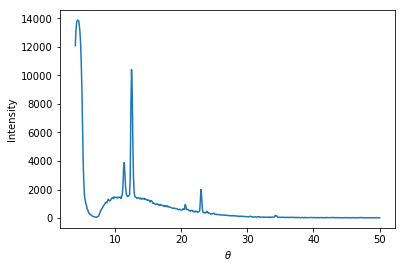

In [31]:
# Plotting and saving raw, un-corrected data for 35kV
plt.plot(rows,rows2)
plt.xlabel("$\\theta$")
plt.ylabel("Intensity")
#plt.xlim(10,15)
plt.show()
#plt.savefig("Anode_Char_35kV.png")

In [32]:
#Zero-point correction calculation for 35kV:

theta_min_35kV = 7.2

# Technique I
'''
theta_K_b_35kV = 12.5
E_max_35kV = energy(theta_min_35kV)
#print("Max energy =",E_max_35kV)
E_K_b_35kV = energy(theta_K_b_35kV)
Point_K_b_35kV = [theta_K_b_35kV, E_K_b_35kV/1000] #in keV
Point_min_35kV = [theta_min_35kV, E_max_35kV/1000] #in keV

a_corr_35kV = -(Point_K_b_35kV[1]-Point_min_35kV[1])/(Point_K_b_35kV[0]-Point_min_35kV[0])
#print(a_corr)
b_corr_35kV = Point_K_b_35kV[1] - a_corr_35kV*Point_K_b_35kV[0]
#print(b_corr)
true_min_35kV = -b_corr_35kV/a_corr_35kV
'''

# Technique II
# true_min_35kV= arcsin((h_p*c_light*180)/(2*d_LiF*math.pi*35000))
true_min_35kV = 5.046
corr_35kV =theta_min_35kV-true_min_35kV #from other technique
E_max_35kV = energy(true_min_35kV)

print("Brems angle =", theta_min_35kV)
print("true minimum for 35kV =", true_min_35kV, "degrees")
corr_35kV = theta_min_35kV - true_min_35kV
print("Correction for 35 kV =", corr_35kV, "degrees")


Brems angle = 7.2
true minimum for 35kV = 5.046 degrees
Correction for 35 kV = 2.154 degrees


In [33]:
# Correcting the angle:
rows_corr = [x-corr_35kV for x in rows]


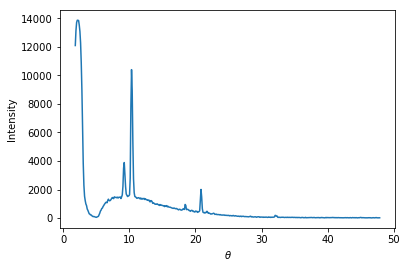

In [34]:
# Plotting and saving new figure for 35kV

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

plt.plot(rows_corr,rows2)
plt.xlabel("$\\theta$")
plt.ylabel("Intensity")
#plt.xlim(10.3,10.5)
plt.show()
#plt.savefig("Anode_Char_35kV_corr.png")

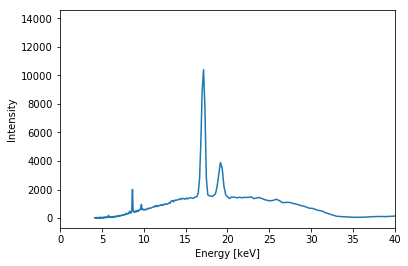

In [35]:
# Rewrite angles as energies
e_angles = []
for x in range(len(rows_corr)):
    e_angle = energy(rows_corr[x])/1000
    e_angles.append(e_angle)

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

e_35kV = e_angles

plt.plot(e_angles,rows2)
plt.xlabel("Energy [keV]")
plt.ylabel("Intensity")
plt.xlim(0,40)
plt.show()
#plt.savefig("Anode_Char_35kV_corr_eV.png")

In [36]:
# Data processing Part 1
# Measured angles of the two transition lines:
#theta_1_35kV = 9.4 #old
#theta_2_35kV = 10.5 #old

theta_1_35kV = 9.25
theta_2_35kV = 10.35

E_1_35kV = energy(theta_1_35kV)
print("Energy 1 calculated =", E_1_35kV/1000, "keV")
E_2_35kV = energy(theta_2_35kV)
print("Energy 2 calculated =", E_2_35kV/1000, "keV")
energies_calc = [E_1_35kV, E_2_35kV]

Energy 1 calculated = 19.150376404579866 keV
Energy 2 calculated = 17.13385177149251 keV


In [37]:
# Data processing Part 1
# Possible transitions for molybdenum:
# Highligthed ones
Ka1 = -19999-(-2625) # in eV
Ka2 = -19999-(-2520) # in eV
Kb = -19999-(-410) # in eV
sel_transitions = [Ka1, Ka2, Kb]
print("Selected transitions =", sel_transitions)

# all possible
L1_K = -19999-(-3866)
L2_K = Ka1
L3_K = Ka2
M1_K = -19999-(-505)
M2_K = Kb
M3_K = -19999-(-392)
M4_K = -19999-(-321)
M5_K = -19999-(-228)
all_transistions = [L1_K, L2_K, L3_K, M1_K, M2_K, M3_K, M4_K, M5_K]
print("all transitions =", all_transistions)

Selected transitions = [-17374, -17479, -19589]
all transitions = [-16133, -17374, -17479, -19494, -19589, -19607, -19678, -19771]


In [38]:
# The 25kV anode characterization data

In [39]:
#data_LiF_25kV = open('/Users/QDevMaster12/Dropbox/LiF/anode_characterization_25kV_001-kopi', 'r')
data_LiF_25kV = open('C:/Users/kylli/Dropbox/LiF/anode_characterization_25kV_001-kopi', 'r')

rows3 = []
rows4 = []
for line in data_LiF_25kV:
    # Split on any whitespace (including tab characters)
    row = line.split()
    # Convert strings to numeric values:
    row[0] = float(row[0])
    row[1] = int(row[1])
    # Append to our list of lists:
    rows3.append(row[0])
    rows4.append(row[1])


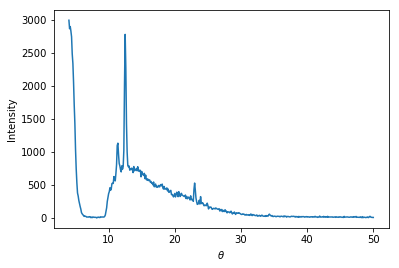

In [40]:
# Plotting and saving raw, un-corrected data for 25kV

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

plt.plot(rows3,rows4)
plt.xlabel("$\\theta$")
plt.ylabel("Intensity")
#plt.xlim(10,15)
plt.show()
#plt.savefig("Anode_Char_25kV.png")

In [41]:
#Zero-point correction calculation for 25kV:
# We just use the same as for 35kV, according to Kell
"""
theta_min_25kV = 9.5
theta_K_b_25kV = 12.5
E_max_25kV = energy(theta_min_25kV)
#print("Max energy =",E_max_25kV)
E_K_b_25kV = energy(theta_K_b_25kV)
Point_K_b_25kV = [theta_K_b_25kV, E_K_b_25kV/1000] #in keV
Point_min_25kV = [theta_min_25kV, E_max_25kV/1000] #in keV

a_corr_25kV = -(Point_K_b_25kV[1]-Point_min_25kV[1])/(Point_K_b_25kV[0]-Point_min_25kV[0])
#print(a_corr)
b_corr_25kV = Point_K_b_25kV[1] - a_corr_25kV*Point_K_b_25kV[0]
#print(b_corr)
true_min_25kV = -b_corr_25kV/a_corr_25kV
print("true minimum for 25kV =", true_min_25kV, "degrees")
corr_25kV = Point_min_25kV[0] - true_min_25kV
print("Correction for 25kV =", corr_25kV, "degrees")
"""
theta_min_25kV = 9.5
true_min_25kV = theta_min_25kV - corr_35kV
E_max_25kV = energy(true_min_25kV)
print("true minimum for 25kV =", true_min_25kV, "degrees")
print("Correction for 25kV =", corr_35kV, "degrees")
print("Maximum energy =", E_max_25kV)

true minimum for 25kV = 7.346 degrees
Correction for 25kV = 2.154 degrees
Maximum energy = 24075.228311378432


In [42]:
# Correcting the angle:
#rows3_corr = [x-corr_25kV for x in rows3]
rows3_corr = [x-corr_35kV for x in rows3]

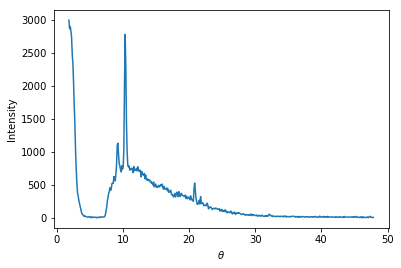

In [43]:
# Plotting and saving new figure for 25kV
plt.plot(rows3_corr,rows4)
plt.xlabel("$\\theta$")
plt.ylabel("Intensity")
#plt.xlim(10,15)
plt.show()
#plt.savefig("Anode_Char_25kV_corr.png")

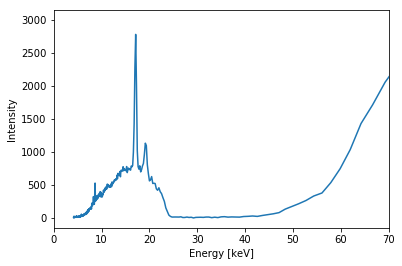

In [44]:
# Rewrite angles as energies
e_angles = []
for x in range(len(rows3_corr)):
    e_angle = energy(rows3_corr[x])/1000
    e_angles.append(e_angle)

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

e_25kV = e_angles

plt.plot(e_angles,rows4)
plt.xlabel("Energy [keV]")
plt.ylabel("Intensity")
plt.xlim(0,70)
plt.show()
#plt.savefig("Anode_Char_25kV_corr_eV.png")

In [45]:
# Data processing Part 2
# The "brems" angles:
print("35kv: brems angle =", true_min_35kV, "degrees", ",", "brems energy =", E_max_35kV, "eV", "=", E_max_35kV*1.602*10**(-19), "J")
print("25kV: brems angle =", true_min_25kV, "degrees", ",", "brems energy =", E_max_25kV, "eV", "=", E_max_25kV*1.602*10**(-19), "J")


35kv: brems angle = 5.046 degrees , brems energy = 34998.1553489532 eV = 5.6067044869023035e-15 J
25kV: brems angle = 7.346 degrees , brems energy = 24075.228311378432 eV = 3.856851575482825e-15 J


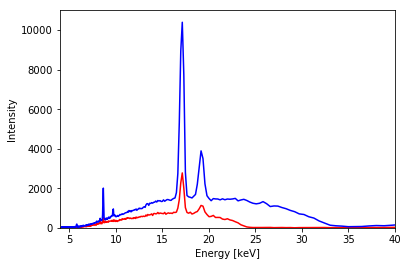

In [53]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

plt.plot(e_25kV,rows4, 'r')
plt.plot(e_35kV, rows2, 'b')
plt.xlabel("Energy [keV]")
plt.ylabel("Intensity")
plt.xlim(4,40)
plt.ylim(0,11000)
plt.show()
#plt.savefig("Part7_2.pdf")